<a href="https://www.kaggle.com/code/adielkilonzi/google-data-analytics-bellabeat-capstone-project?scriptVersionId=122997218" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Bellabeat Capstone Project

## 1. Ask

Questions we need to ask.

1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help inﬂuence Bellabeat marketing strategy?

#### 1.1 Business Task
Identifying themes in externally collected user data to help inform marketting strategy.

#### 1.2 Data Sources
The Data is [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit) Provided on Kaggle an open data sharing platform that also holds competitions. The data is provided under the **CC0: Public Domain Licence**. 


## 2. Prepare

#### 2.1 Data Storage
Data is stored in kaggle spread in mulitple csv files. The Files used in this particular analysis are:

- **dailySteps_merged.csv** - This file contains activities that have been aggregated daily and merged from the other daily files. The notable exception is there is no sleep data on this file.
- **sleepDay_merged.csv** - This is where the sleep activity for the subjects was logged.
- **heartrate_seconds_merged.csv** - Heart beat rates taken in 5 seconds interval.


In [1]:
# Load The libraries we will use to manipulate our data best practice is it is done at the top of the program

options(warn = -1)
library("tidyverse") # metapackage of all tidyverse packages
library("lubridate")
library("reshape2")
library("corrplot")
library("gridExtra") 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


corrplot 0.92 loaded


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
#Load data into our platform
dailyActivity <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleepDay <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
heartrate <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2483658 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Time
dbl (2): Id, Value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_

## 3. Process
​
#### 3.1 Data bias
The data is biased Because the it only has 33 participants and gets worse because the subsets such as **sleepDay** and **heartrate** have 24 and 14 participants data meaning it does not even represent the whole set of participants. This data clearly **does not** represent the population. The other bias is that this data is collected from participants who volunteered to share their data, This may indicate a sampling bias since it only shows those who were willing to share data out of a very large population who uses fitbit.

In [3]:
n_distinct(dailyActivity$Id)
n_distinct(sleepDay$Id)
n_distinct(heartrate$Id)

[1] 33

[1] 24

[1] 14

#### 3.2 Does the data ROCCC?

No. The data does not meet the ROCCC Criteria because:

- **Reliability** - The data seems to have been collected by reliable measuring tooks that is fitbit but there does seem to be data missing for participants in some areas as noted above as an example we only have 14 participants with heartrate information. This missing data and small sample size makes it hard for us to make conclusions about the larger population in general.
- **Original** - The data is Original shared by fitbit.
- **Comprehensive** - The data is not comprehensive due to small sample size.
- **Current** - The data is not current as it covers the year 2016.
- **Cited** - The data is credible as it was shared by fitbit with user consent.

## 4. Process

#### 4.1 Tools

The tool I am going to use is **R Programming** the reason is because R allows for for easy manipulations as some files are large and will make exploration in excel too slow.

#### 4.2 Data Integrity
We need to know our data abit more such as the fields and basic statistics about the numerical fields in the data set. In the **dailyActivity** summary we can see also many measurements have 0 as the minimum this indicates that some missing values may have been substituted for 0 showing our data's incompleteness further. From the **heartrate** we can see there are some things we can consider anormalies a minimum heartrate of 36 is too low and a maximum value of 203 is also too high. 





In [4]:
summary(dailyActivity)

       Id            ActivityDate         TotalSteps    TotalDistance   
 Min.   :1.504e+09   Length:940         Min.   :    0   Min.   : 0.000  
 1st Qu.:2.320e+09   Class :character   1st Qu.: 3790   1st Qu.: 2.620  
 Median :4.445e+09   Mode  :character   Median : 7406   Median : 5.245  
 Mean   :4.855e+09                      Mean   : 7638   Mean   : 5.490  
 3rd Qu.:6.962e+09                      3rd Qu.:10727   3rd Qu.: 7.713  
 Max.   :8.878e+09                      Max.   :36019   Max.   :28.030  
 TrackerDistance  LoggedActivitiesDistance VeryActiveDistance
 Min.   : 0.000   Min.   :0.0000           Min.   : 0.000    
 1st Qu.: 2.620   1st Qu.:0.0000           1st Qu.: 0.000    
 Median : 5.245   Median :0.0000           Median : 0.210    
 Mean   : 5.475   Mean   :0.1082           Mean   : 1.503    
 3rd Qu.: 7.710   3rd Qu.:0.0000           3rd Qu.: 2.053    
 Max.   :28.030   Max.   :4.9421           Max.   :21.920    
 ModeratelyActiveDistance LightActiveDistance Sedentary

In [5]:
summary(sleepDay)

       Id              SleepDay         TotalSleepRecords TotalMinutesAsleep
 Min.   :1.504e+09   Length:413         Min.   :1.000     Min.   : 58.0     
 1st Qu.:3.977e+09   Class :character   1st Qu.:1.000     1st Qu.:361.0     
 Median :4.703e+09   Mode  :character   Median :1.000     Median :433.0     
 Mean   :5.001e+09                      Mean   :1.119     Mean   :419.5     
 3rd Qu.:6.962e+09                      3rd Qu.:1.000     3rd Qu.:490.0     
 Max.   :8.792e+09                      Max.   :3.000     Max.   :796.0     
 TotalTimeInBed 
 Min.   : 61.0  
 1st Qu.:403.0  
 Median :463.0  
 Mean   :458.6  
 3rd Qu.:526.0  
 Max.   :961.0  

In [6]:
summary(heartrate)

       Id                Time               Value       
 Min.   :2.022e+09   Length:2483658     Min.   : 36.00  
 1st Qu.:4.388e+09   Class :character   1st Qu.: 63.00  
 Median :5.554e+09   Mode  :character   Median : 73.00  
 Mean   :5.514e+09                      Mean   : 77.33  
 3rd Qu.:6.962e+09                      3rd Qu.: 88.00  
 Max.   :8.878e+09                      Max.   :203.00  

Below I confirm my hypothesis that that there are blank fields that have been filled with 0 by checking the *TotalSteps* field.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


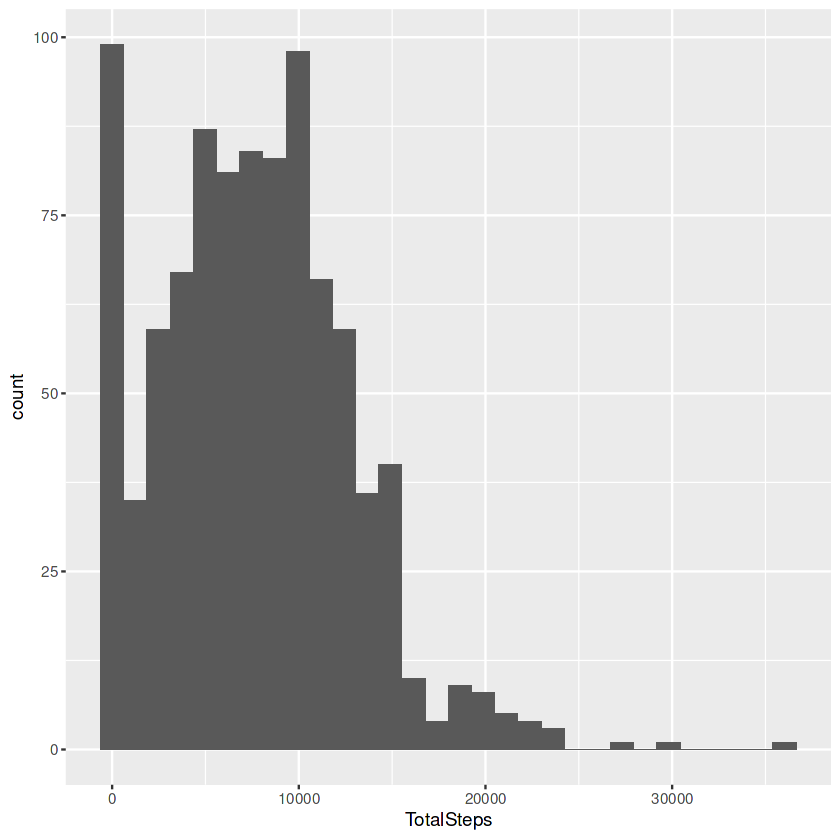

In [7]:
ggplot(data=dailyActivity) +
    geom_histogram(aes(x=TotalSteps)) 

It is also notable that there are no *N/A* values in the data indicating that the number 0 indicates missing data.

In [8]:
sapply(dailyActivity, function(x) sum(is.na(x)))

Id             ActivityDate               TotalSteps 
                       0                        0                        0 
           TotalDistance          TrackerDistance LoggedActivitiesDistance 
                       0                        0                        0 
      VeryActiveDistance ModeratelyActiveDistance      LightActiveDistance 
                       0                        0                        0 
 SedentaryActiveDistance        VeryActiveMinutes      FairlyActiveMinutes 
                       0                        0                        0 
    LightlyActiveMinutes         SedentaryMinutes                 Calories 
                       0                        0                        0

In [9]:
sapply(sleepDay, function(x) sum(is.na(x)))

Id           SleepDay  TotalSleepRecords TotalMinutesAsleep 
                 0                  0                  0                  0 
    TotalTimeInBed 
                 0

In [10]:
sapply(heartrate, function(x) sum(is.na(x)))

Id  Time Value 
    0     0     0

Let us check how the **heartrate** *Value* is distributed. we can see there are some anormalies but I will use an average version of the values hopefully it will cancel out the anormalies. The normal heart rate is between 60 to 100 but it can surpass that during exercise according to [this](https://www.health.harvard.edu/heart-health/what-your-heart-rate-is-telling-you) Havard article.

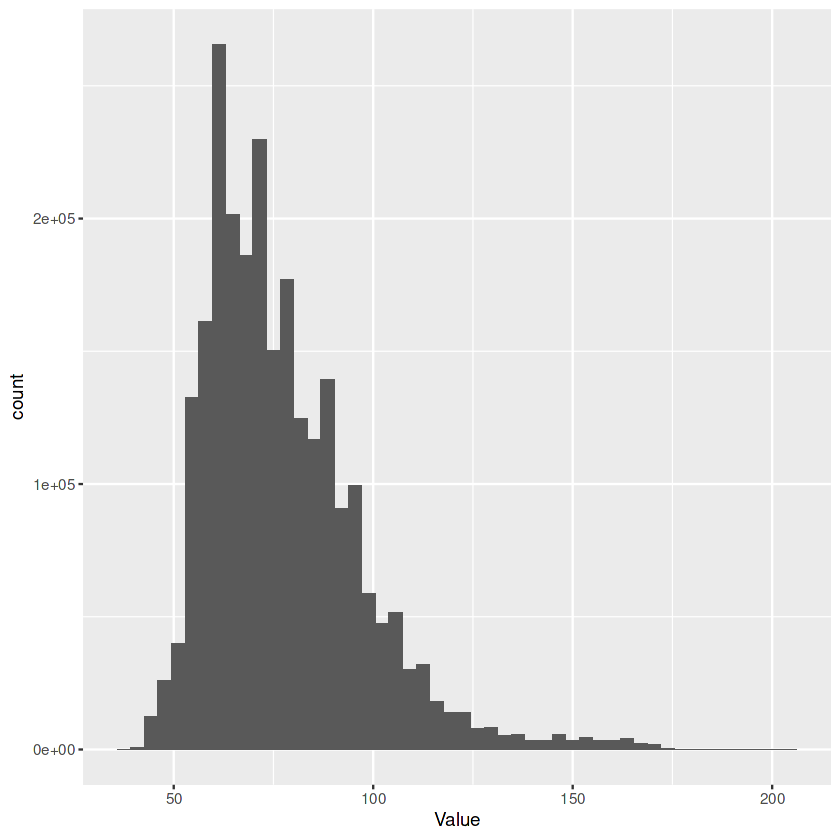

In [11]:
ggplot(data=heartrate) +
    geom_histogram(aes(x=Value), bins=50)

#### 4.3 Data Manipulation
First notable thing is that the date fields are recognized as string and not dates and we need them to be dates so that we can utilize that piece of information for features such as date of the week. For the **heartrate** information it needs to be aggregated to the daily so that it can also be analysed and merged.  


In [12]:
dailyActivity$DateLogged = mdy(dailyActivity$ActivityDate)
dailyActivity = subset(dailyActivity, select = -c(ActivityDate))
dailyActivity$DayOfWeek = wday(dailyActivity$DateLogged,label=TRUE, abbr=FALSE)
glimpse(dailyActivity)

Rows: 940
Columns: 16
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ TotalSteps               <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMinutes     <dbl> 328, 217, 181, 209, 221, 164, 233, 264, 205, …
$ SedentaryMinutes

In [13]:
heartrate$DateLogged = mdy_hms(heartrate$Time)
heartrate = subset(heartrate, select = -c(Time))
heartrate$DateAlone = as_date(heartrate$DateLogged)

#Aggregate the day information of heartrate for each person and per date 
averageDailyHeartrate <- heartrate %>% group_by(Id, DateAlone) %>%
  summarise(DailyHeartMeanValue = mean(Value))
glimpse(averageDailyHeartrate)

`summarise()` has grouped output by 'Id'. You can override using the `.groups`
argument.


Rows: 334
Columns: 3
Groups: Id [14]
$ Id                  <dbl> 2022484408, 2022484408, 2022484408, 2022484408, 20…
$ DateAlone           <date> 2016-04-12, 2016-04-13, 2016-04-14, 2016-04-15, 2…
$ DailyHeartMeanValue <dbl> 75.80418, 80.33758, 72.62860, 80.43738, 75.96055, …


Heartrate information has been merged and it does take care of the extreme arnomalies.

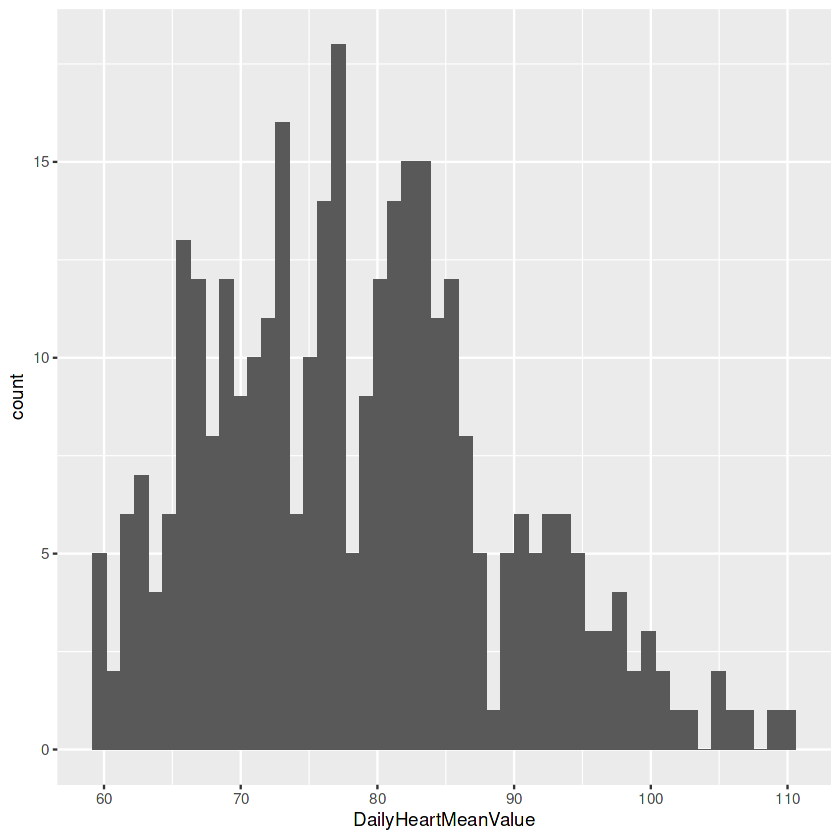

In [14]:
ggplot(data=averageDailyHeartrate) +
    geom_histogram(aes(x=DailyHeartMeanValue), bins=50)

Sleep data also needs the date field to be converted to date format.

In [15]:
sleepDay$DateLogged =  as_date(mdy_hms(sleepDay$SleepDay))
sleepDay = subset(sleepDay, select = -c(SleepDay))
glimpse(sleepDay)

Rows: 413
Columns: 5
$ Id                 <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150…
$ TotalSleepRecords  <dbl> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ TotalMinutesAsleep <dbl> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430, 2…
$ TotalTimeInBed     <dbl> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449, 3…
$ DateLogged         <date> 2016-04-12, 2016-04-13, 2016-04-15, 2016-04-16, 20…


Now all the data sets need to be merged into one so that we can analyses and see what we can identify.

In [16]:
#Merge the data set retaining fields in the x side and replacing the created N/A with zeros
addDailyActivity <- merge(x=dailyActivity, y=averageDailyHeartrate, by.x=c("Id","DateLogged"), by.y=c("Id", "DateAlone"), all.x = TRUE)
addDailyActivity <- merge(x=addDailyActivity, y=sleepDay, by.x=c("Id","DateLogged"), by.y=c("Id", "DateLogged"), all.x = TRUE)
addDailyActivity[is.na(addDailyActivity)] <- 0 
glimpse(addDailyActivity)

Rows: 943
Columns: 20
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ DateLogged               <date> 2016-04-12, 2016-04-13, 2016-04-14, 2016-04-…
$ TotalSteps               <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

## 5. Analyze

#### 5.1 Correlation
Correlation is always a good way to start to see some relationships. It is apparent that one burns more calories the more active they are and the more steps they take.

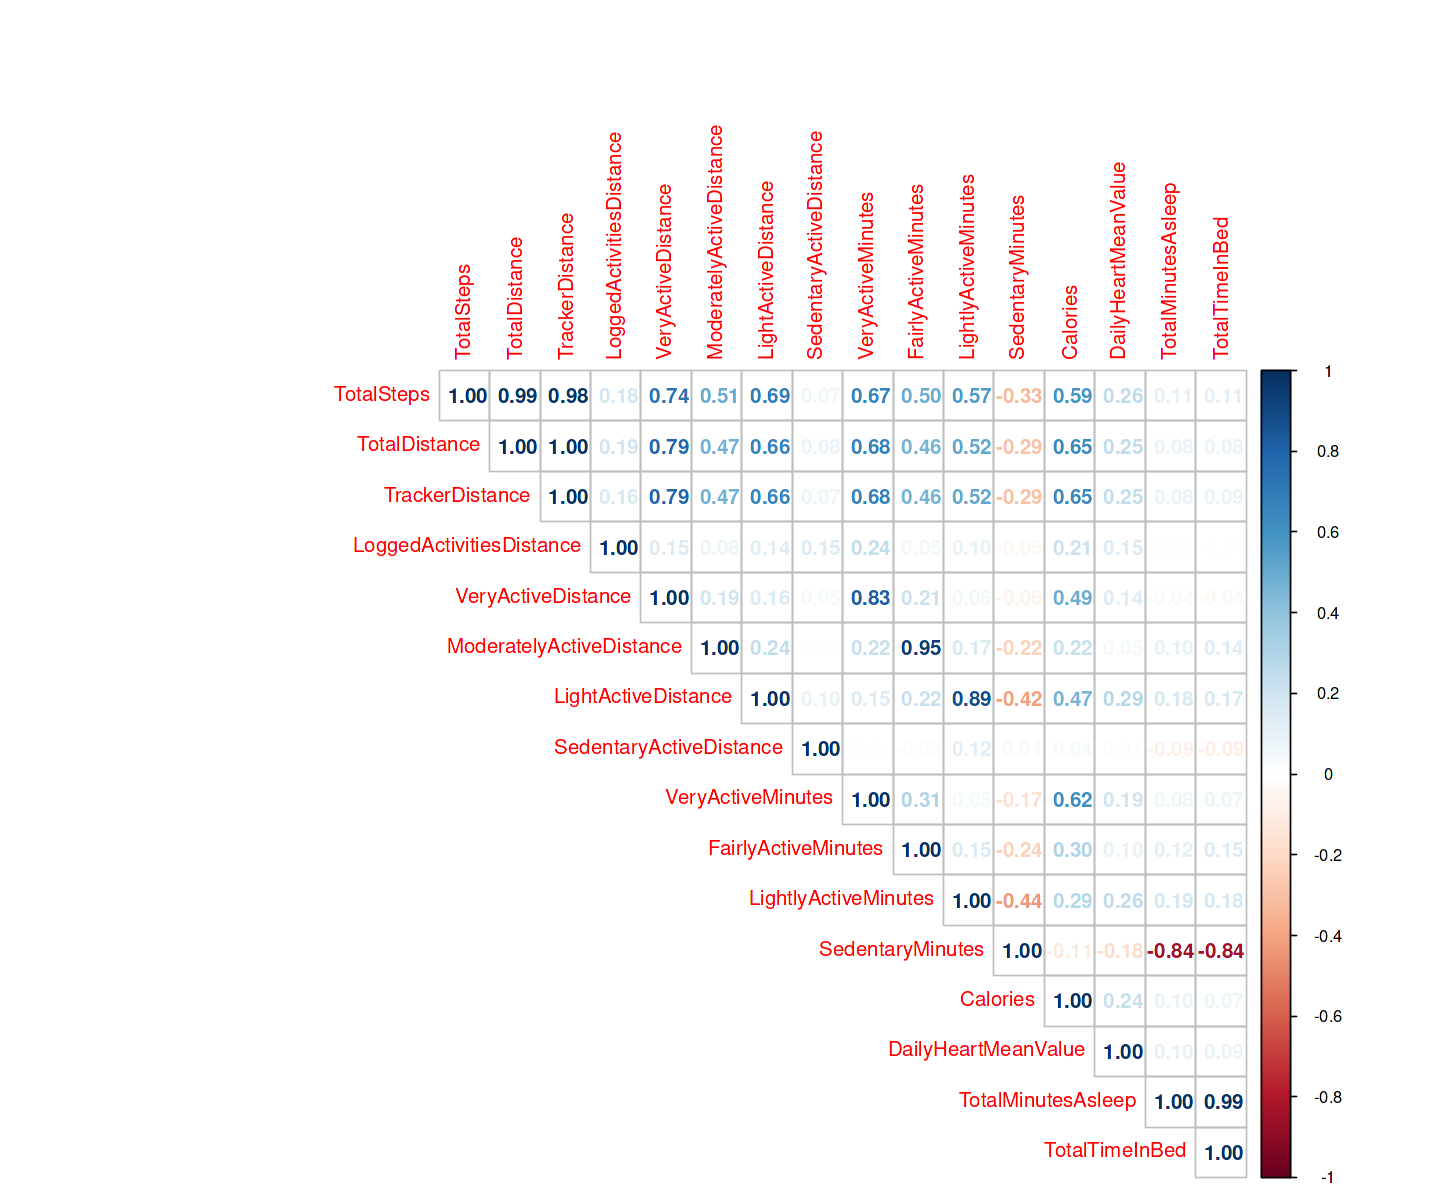

In [17]:
options(repr.plot.width=12, repr.plot.height=10)
corrplot(cor(addDailyActivity[c("TotalSteps", "TotalDistance", "TrackerDistance", "LoggedActivitiesDistance", "VeryActiveDistance", "ModeratelyActiveDistance", "LightActiveDistance", "SedentaryActiveDistance", "VeryActiveMinutes", "FairlyActiveMinutes", "LightlyActiveMinutes", "SedentaryMinutes", "Calories", "DailyHeartMeanValue", "TotalMinutesAsleep", "TotalTimeInBed")]),
  method = "number",
  type = "upper" # show only upper side
)

## 6. Share
#### 6.1 Correlation

The number of steps one takes is directly correlated with the steps taken. This information is intuitive but should be shared with users reminding them to take a walk especially if they are inclined to maintain and loose weight. A correlation of **0.5** means that the relationship between calories and total steps is significant enough.



`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


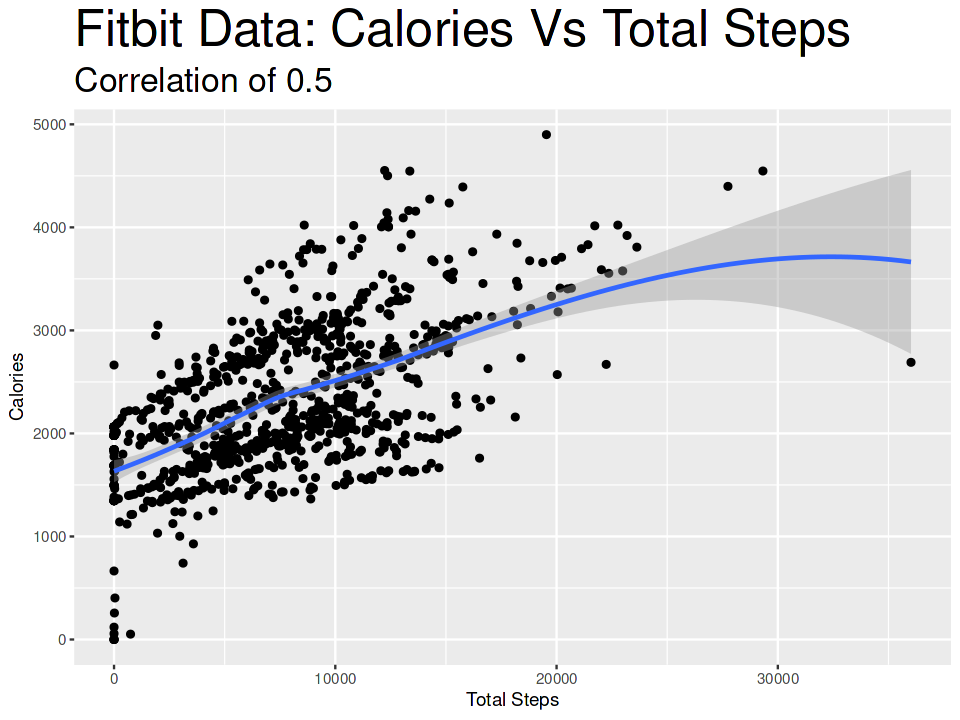

In [18]:
#addDailyActivity
options(repr.plot.width=8, repr.plot.height=6)
ggplot(data=addDailyActivity) +
    geom_point(aes(x=TotalSteps, y=Calories)) +
    geom_smooth(aes(x=TotalSteps, y=Calories)) +
    labs(title="Fitbit Data: Calories Vs Total Steps", subtitle = "Correlation of 0.5", x = "Total Steps") +
    theme(plot.title = element_text(size = 30), plot.subtitle = element_text(size = 20))

#### 6.2 Days of the week trends

It is notable that Tuesday has the highest number of steps both in total and in average. This is something that requires further investigation as to why. Saturday has a high number when it comes to average but not so high when it comes to total steps This is caused by the high number of steps taken by the outliers as shown in the box plots.

**Recommendations:** A functionality that encourages users to set up number of steps so that they can be more consistent and get alerts on how they are performing.

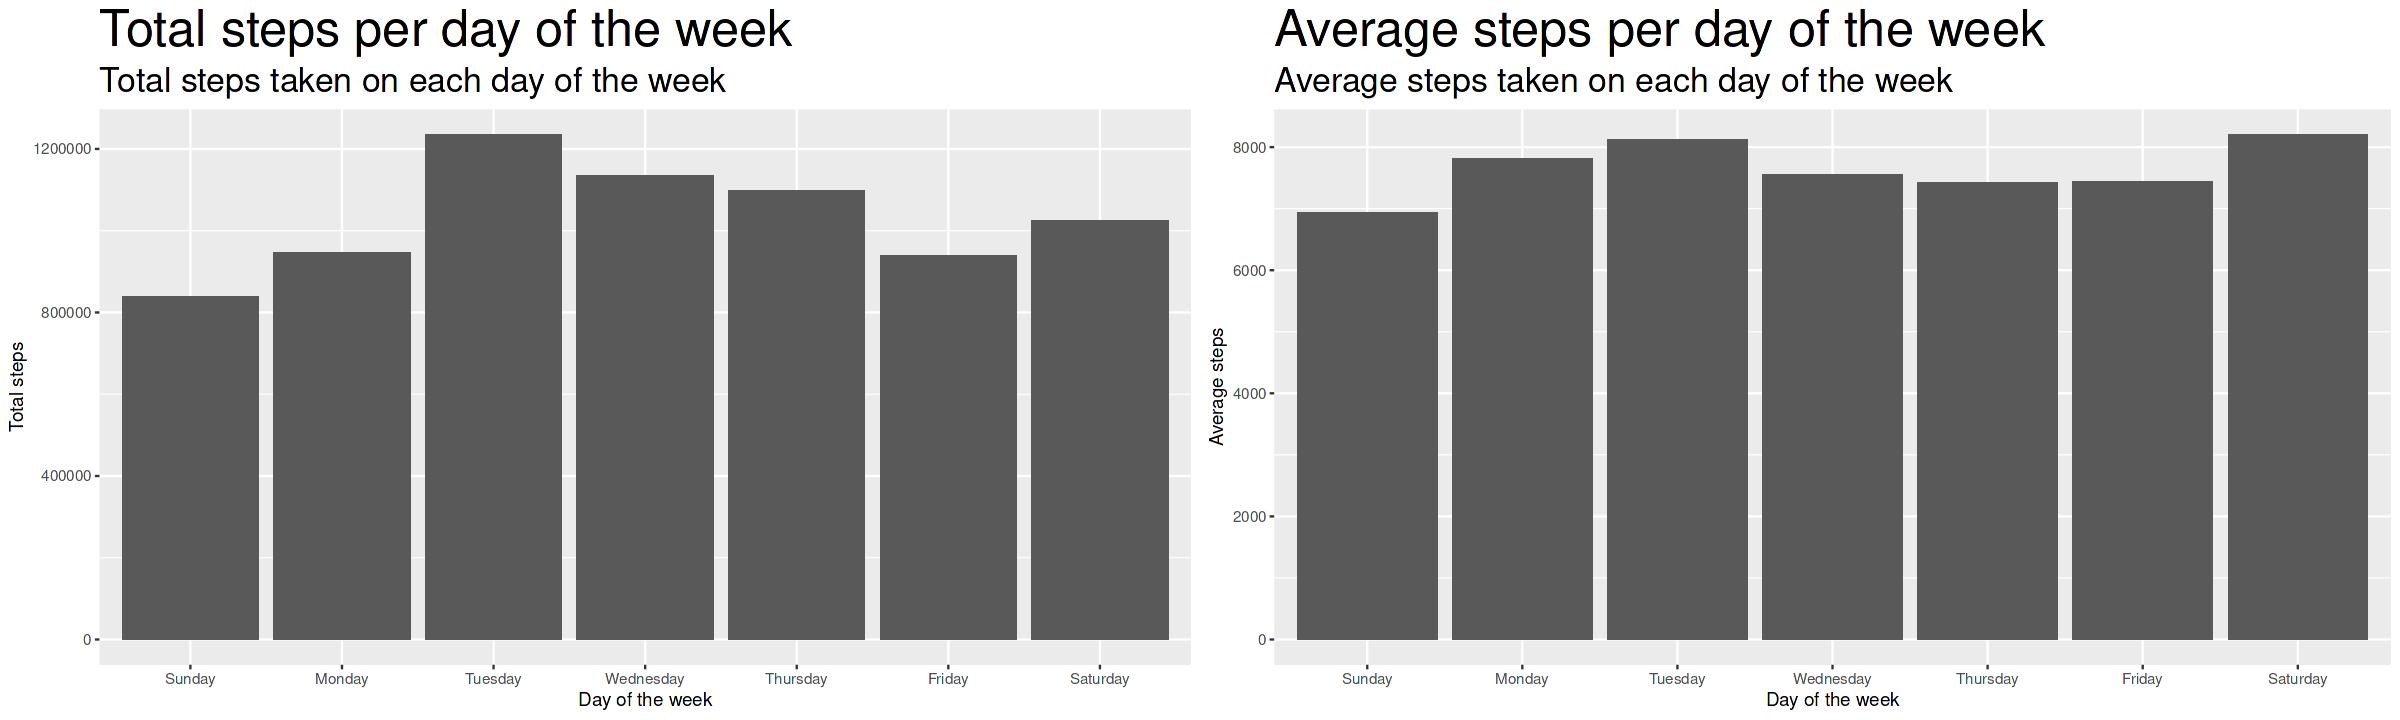

In [19]:
options(repr.plot.width=20, repr.plot.height=6)
#plot total steps
plot1 = ggplot(data=addDailyActivity) +
    geom_col(aes(x=DayOfWeek, y=TotalSteps)) +
    labs(title="Total steps per day of the week", subtitle = "Total steps taken on each day of the week", x = "Day of the week", y = "Total steps") +
    theme(plot.title = element_text(size = 30), plot.subtitle = element_text(size = 20))

#plot average steps per day
AverageSteps <- addDailyActivity %>% group_by(DayOfWeek) %>%
    summarise(DailyMeanValue = mean(TotalSteps))
plot2 = ggplot(data=AverageSteps) +
    geom_col(aes(x=DayOfWeek, y=DailyMeanValue))+
    labs(title="Average steps per day of the week", subtitle = "Average steps taken on each day of the week", x = "Day of the week", y = "Average steps") +
    theme(plot.title = element_text(size = 30), plot.subtitle = element_text(size = 20))
#put the 2 plots together
grid.arrange(plot1, plot2, ncol=2)


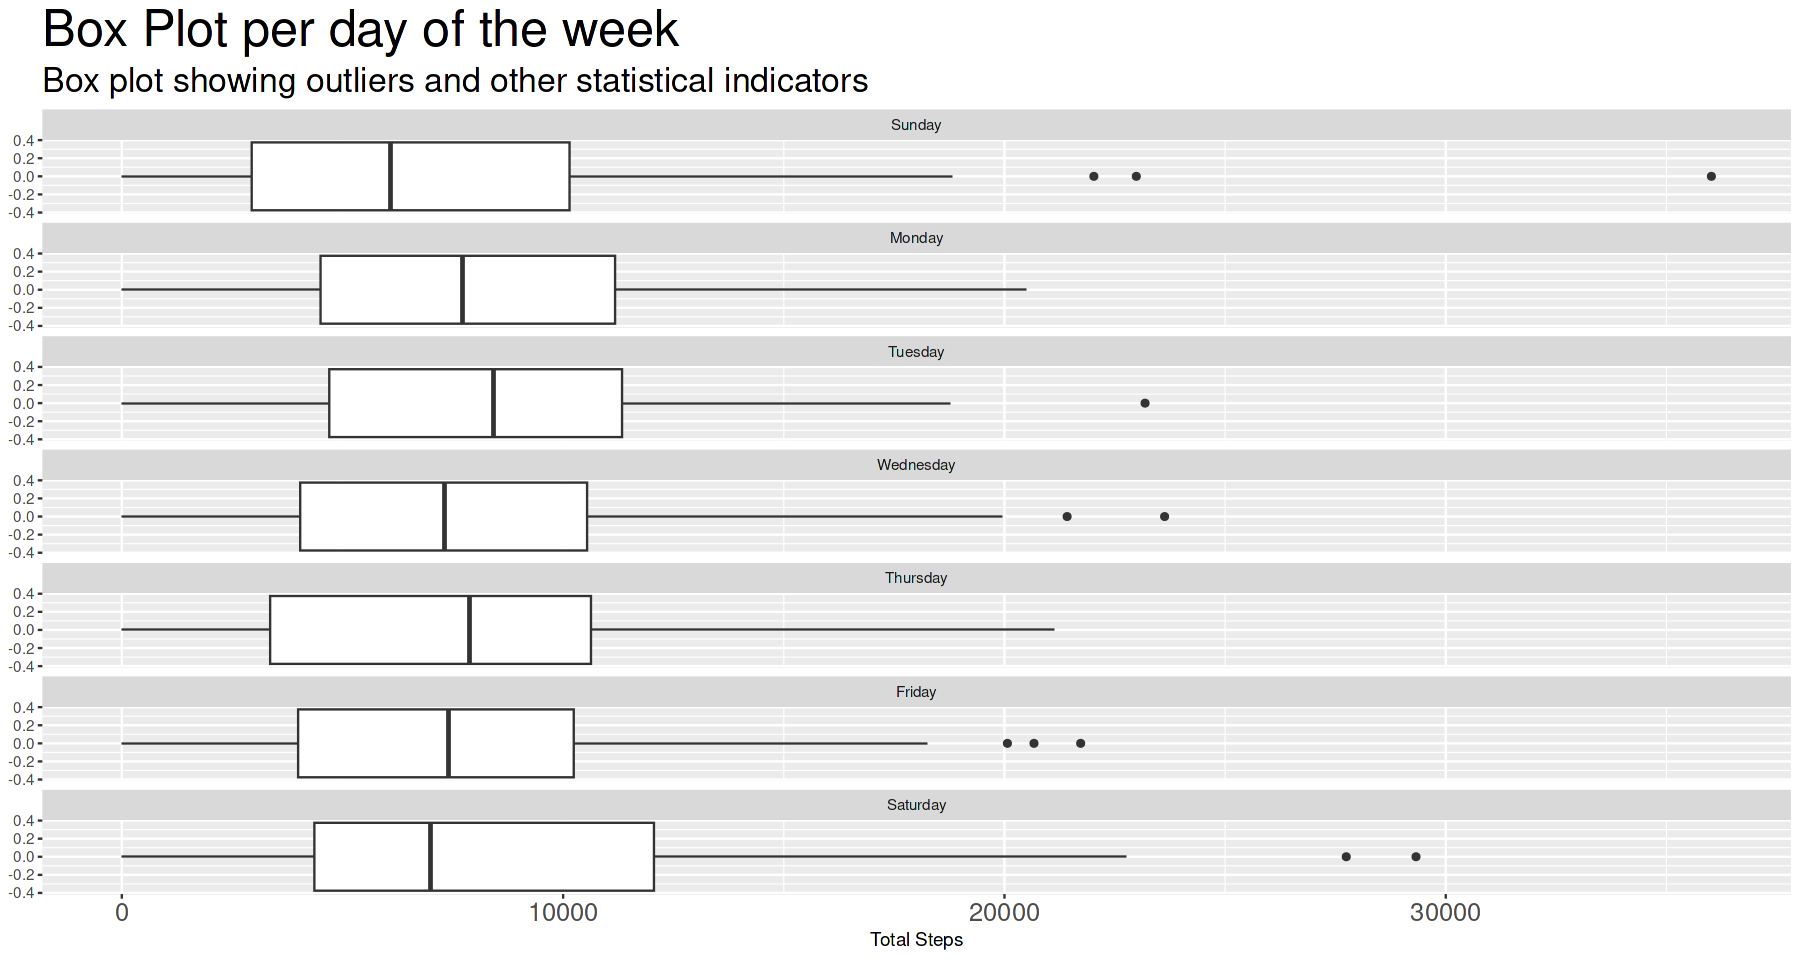

In [20]:
options(repr.plot.width=15, repr.plot.height=8)
ggplot(data=addDailyActivity) +
    geom_boxplot(aes(x=TotalSteps))+
    facet_wrap(~DayOfWeek, ncol=1) +
    labs(title="Box Plot per day of the week", subtitle = "Box plot showing outliers and other statistical indicators", x = "Total Steps") +
    theme(plot.title = element_text(size = 30), plot.subtitle = element_text(size = 20), axis.text.x = element_text(size = 15))

According to experts from the [National Heart, Lung and Blood institute](https://www.nhlbi.nih.gov/health/sleep/how-much-sleep) and [CDC](https://www.cdc.gov/sleep/about_sleep/how_much_sleep.html) adults need between 7 - 9 hours of sleep that is between **420 and 540 minutes of sleep daily.**  It is notable that the averages for Tuesday, Thursday and Friday fall below this figure.

Wednesday has the second highest average and is also consistent in terms of the distribution as we can see the interquartile ranges are closer and very few outliers compared to the other days. This needs investigation as to why it is happening it maybe because Wednesday is midweek and therefore aligns well with people who are busy both early and later in the week. More data is needed however before that conclusion is reached.

**Recomendations:** Allow our users rate their days based on how busy they are and come up with a sleep schedule that will notify our users on when they should sleep to achieve the healthy target of at least 420 minutes a day. Try to also optimize for regular sleep times.

In [21]:
#Finding the average of non zero values since the many zero values skews the average 
AverageSleep <- addDailyActivity %>% filter(TotalMinutesAsleep > 0) %>% group_by(DayOfWeek) %>%
  summarise(DailyAverageMinutesSlept = mean(TotalMinutesAsleep))
AverageSleep

DayOfWeek,DailyAverageMinutesSlept
<ord>,<dbl>
Sunday,452.7455
Monday,418.8298
Tuesday,404.5385
Wednesday,434.6818
Thursday,402.3692
Friday,405.4211
Saturday,420.8103


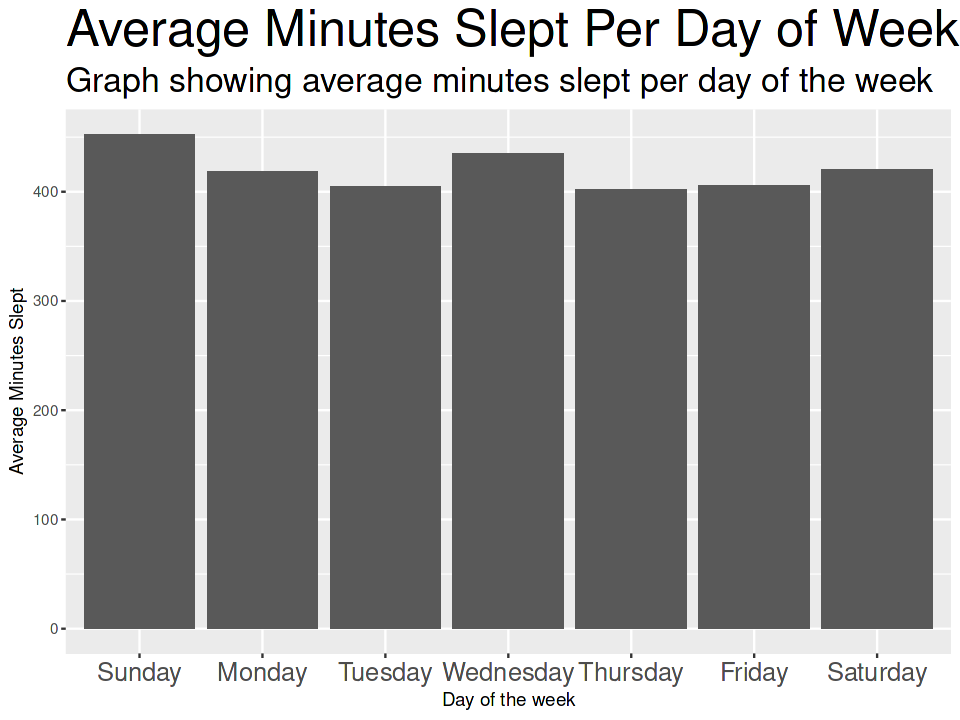

In [22]:
options(repr.plot.width=8, repr.plot.height=6)
ggplot(data=AverageSleep) +
    geom_col(aes(x=DayOfWeek, y=DailyAverageMinutesSlept))+
    labs(title="Average Minutes Slept Per Day of Week", subtitle = "Graph showing average minutes slept per day of the week", x = "Day of the week", y = "Average Minutes Slept") +
    theme(plot.title = element_text(size = 30), plot.subtitle = element_text(size = 20), axis.text.x = element_text(size = 15))

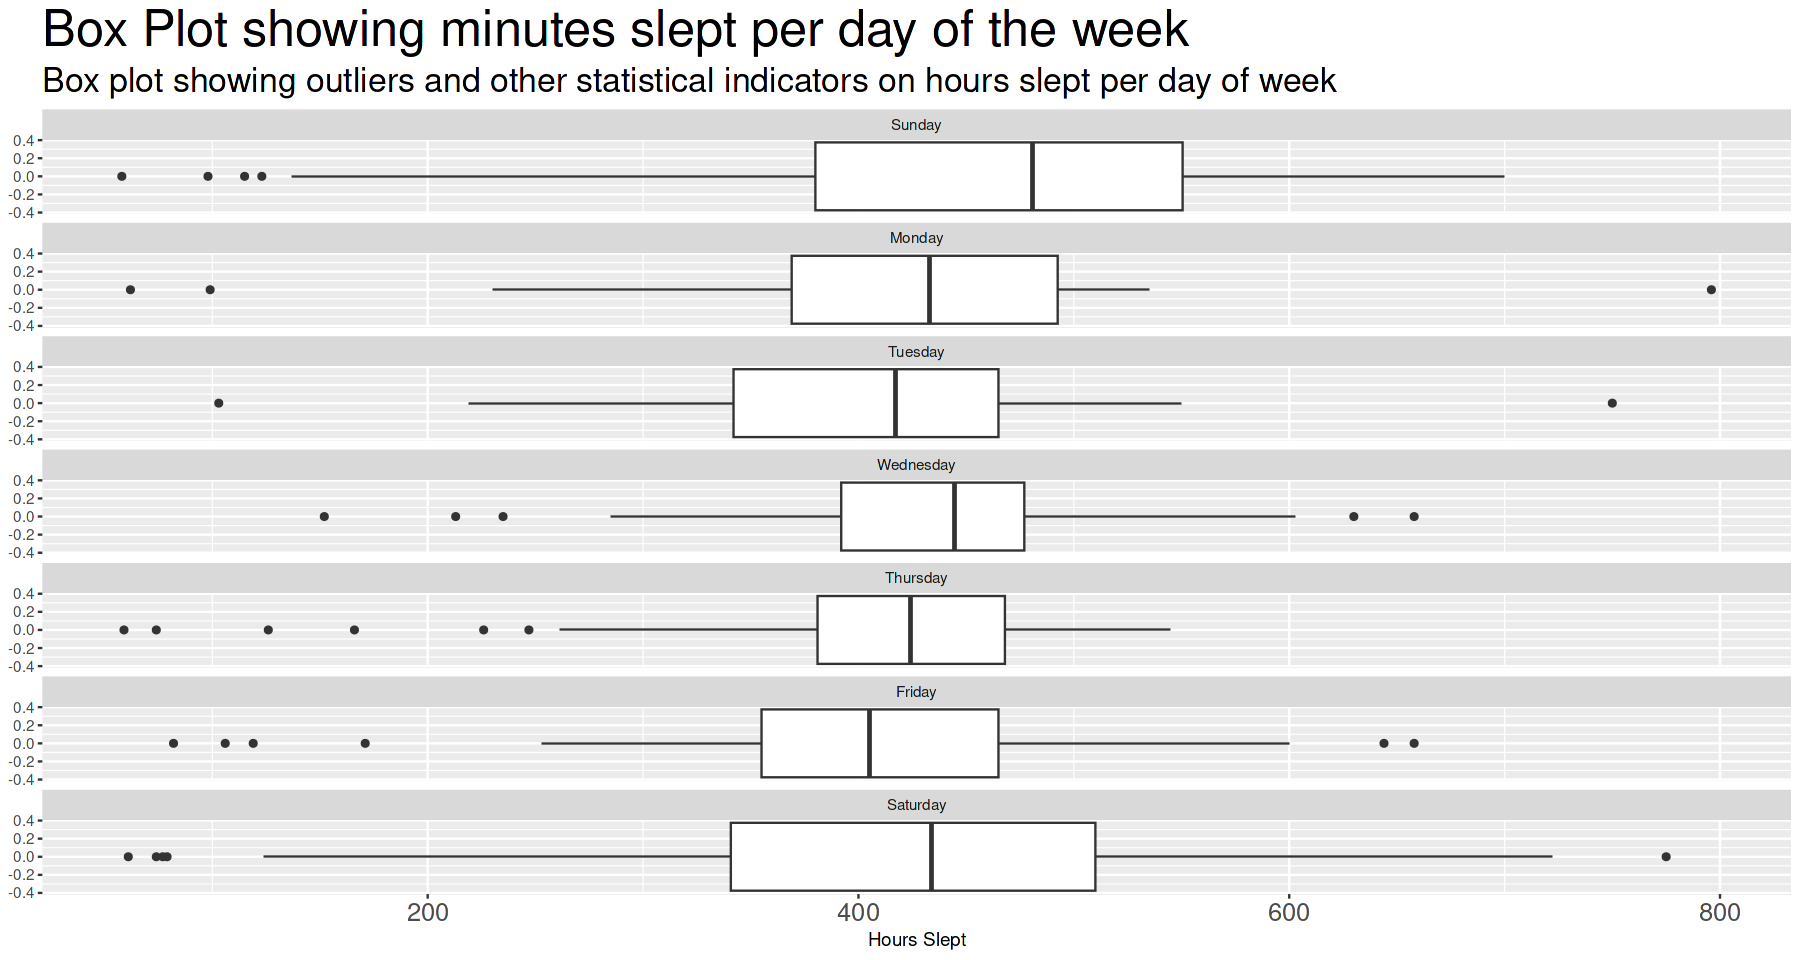

In [23]:
options(repr.plot.width=15, repr.plot.height=8)
ggplot(data=addDailyActivity %>% filter(TotalMinutesAsleep > 0)) +
    geom_boxplot(aes(x=TotalMinutesAsleep))+
    facet_wrap(~DayOfWeek, ncol=1)+
    labs(title="Box Plot showing minutes slept per day of the week", subtitle = "Box plot showing outliers and other statistical indicators on hours slept per day of week", x = "Hours Slept") +
    theme(plot.title = element_text(size = 30), plot.subtitle = element_text(size = 20), axis.text.x = element_text(size = 15))

## 7. Act
#### 7.1 Course of action

* Add alerts for Number of steps - encourage users to set a target number of steps to encourage consistency.
* Add alerts for Sleeping - allow users to define schedule and optimize for a regular sleep pattern above **420 minutes** daily.
* Track other activities -we need more data on activities such as bike riding and water intake.
* Encourage users to use our devices - The data set contains a lot of blank data this could be because users forget to use or do not charge their devices we can send them alerts when the communication between the app and the fitbit fails reminding them to have their device on for best results.
* Fine Tune our devices - Some measurements such as the **Heartrate** data had some values that were wrong indicating an error in the data collection meaning we need to adjust our devices for more accurate readings.
